# SQL Project
You were hired by Ironhack to perform an Analytics Consulting Project entitled: competitive landscape.

Your mission is to create and populate an appropriate database with many coding schools that are our competition, as well as design an suitable queries that answer business questions of interest (to be defined by you)


**Suggested Steps in the Project:**


*   Read this notebook and understand each function. Comment the code appropriately

*   Populate the list of schools with a wider variety of schools (how are you going to get the school ID?)

* Take a look at the obtained dataframes. What dimensions do you have? what keys do you have? how could the different dataframes be connected?

* Go back to the drawing board and try to create an entity relationship diagram for tables available

* Once you have the schemas you want, you will need to:
  - create the suitable SQL queries to create the tables and populate them
  - run these queries using the appropriate Python connectors
  
* Bonus: How will this datamodel be updated in the future? Please write auxiliary functions that test the database for data quality issues. For example: how could you make sure you only include the most recent comments when you re-run the script?


# Suggested Deliverables

* 5-6 minute presentation of data model created, decision process and business analysis proposed

* exported .sql file with the final schema

* Supporting python files used to generate all logic

* High level documentation explaining tables designed and focusing on update methods

Crucial hint: check out the following tutorial:
https://www.dataquest.io/blog/sql-insert-tutorial/


# SwithUp scrapper

In [1]:
# you must populate this dict with the schools required -> try talking to the teaching team about this

schools = {'ironhack' : 10828,'app-academy' : 10525,'springboard' : 11035,'le-wagon' : 10868, 
    'general-assembly':10761,'brainstation': 10571,'flatiron-school': 10748,'4geeks-academy': 10492,
    'academia-de-codigo':10494,'wild-code-school':11169,'edit-disruptive-digital-education':10731,
    'nuclio-digital-school':11509,'neoland':10906,'la-capsule':10853,'careerfoundry':10581,'neue-fische': 11753,
    'spiced-academy': 11034,'brainstation':10571,'nucamp':10923,'shecodes':11014}

import re
import pandas as pd
from pandas.io.json import json_normalize
import requests



def get_comments_school(school):
    TAG_RE = re.compile(r'<[^>]+>')
    # defines url to make api call to data -> dynamic with school if you want to scrape competition
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    #makes get request and converts answer to json
    # url defines the page of all the information, request is made, and information is returned to data variable
    data = requests.get(url).json()
    #converts json to dataframe
    reviews =  pd.DataFrame(data['content']['reviews'])
  
    #aux function to apply regex and remove tags
    def remove_tags(x):
        return TAG_RE.sub('',x)
    reviews['review_body'] = reviews['body'].apply(remove_tags)
    reviews['school'] = school
    return reviews

In [3]:
# could you write this as a list comprehension? ;)
comments = []

for school in schools.keys():
    print(school)
    comments.append(get_comments_school(school))

comments = pd.concat(comments)

ironhack
app-academy
springboard
le-wagon
general-assembly
brainstation
flatiron-school
4geeks-academy
academia-de-codigo
wild-code-school
edit-disruptive-digital-education
nuclio-digital-school
neoland
la-capsule
careerfoundry
neue-fische


KeyError: 'body'

In [5]:
display(comments)

[          id                   name  anonymous hostProgramName  \
 0     306372          Sergio Burgos      False            None   
 1     306215              Anonymous       True            None   
 2     306068              Anonymous       True            None   
 3     305297            Utku Cikmaz      False            None   
 4     305278           Nirmal Hodge      False            None   
 ...      ...                    ...        ...             ...   
 1280  231772              Anonymous      False            None   
 1281  231636        Marcos Sorribas      False            None   
 1282  231611          Xabier Vicuña      False            None   
 1283  231609                    JHD      False            None   
 1284  231815  Enrique Isasi Velasco      False    UX/UI Design   
 
       graduatingYear  isAlumni                                 jobTitle  \
 0               2023     False                 International Negotiator   
 1               2023      True           

In [65]:
from pandas.io.json import json_normalize

def get_school_info(school, school_id):
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

    data = requests.get(url).json()

    data.keys()

    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns= ['courses'])

    locations = data['content']['locations']
    locations_df = json_normalize(locations)

    badges_df = pd.DataFrame(data['content']['meritBadges'])

    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    school_df = pd.DataFrame([website,description,logoUrl]).T
    school_df.columns =  ['website','description','LogoUrl']
    reviews_df = data['content']['reviewMetric']


    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school
    reviews_df['School'] = school


    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id
    reviews_df['School_id'] = school_id

    return locations_df, courses_df, badges_df, school_df,reviews_df

locations_list = []
courses_list = []
badges_list = []
schools_list = []
reviews_list = []

for school, id in schools.items():
    print(school)
    a,b,c,d,e = get_school_info(school,id)

    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)
    reviews_list.append(e)

ironhack


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



app-academy


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



springboard


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



le-wagon


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



brainstation


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



nucamp


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



shecodes


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/4048392650.py:14: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



In [7]:
reviews = pd.DataFrame(reviews_list)
reviews

overallRating  reviewCount                             school  school_id
0            4.8         1285                           ironhack      10828
1           4.69         1198                        app-academy      10525
2           4.68         1559                        springboard      11035
3           4.98         2731                           le-wagon      10868
4           4.27          999                   general-assembly      10761
5           4.66          314                       brainstation      10571
6            4.6          266                    flatiron-school      10748
7           4.89          180                     4geeks-academy      10492
8            4.9          282                 academia-de-codigo      10494
9            4.8          100                   wild-code-school      11169
10           5.0            1  edit-disruptive-digital-education      10731
11          4.43            7              nuclio-digital-school      11509
12          4.77          182                            neoland      10906
13          4.98          332                         la-capsule      10853
14          4.46          183                      careerfoundry      10581
15           0.0            0                        neue-fische      11753
16           4.5           24                     spiced-academy      11034
17          4.75          707                             nucamp      10923
18          4.97         1405                           shecodes      11014

In [8]:
locations_list

[      id               description  country.id   country.name country.abbrev  \
 0  15901           Berlin, Germany        57.0        Germany             DE   
 1  16022       Mexico City, Mexico        29.0         Mexico             MX   
 2  16086    Amsterdam, Netherlands        59.0    Netherlands             NL   
 3  16088         Sao Paulo, Brazil        42.0         Brazil             BR   
 4  16109             Paris, France        38.0         France             FR   
 5  16375  Miami, FL, United States         1.0  United States             US   
 6  16376             Madrid, Spain        12.0          Spain             ES   
 7  16377          Barcelona, Spain        12.0          Spain             ES   
 8  16709          Lisbon, Portugal        28.0       Portugal             PT   
 9  17233                    Online         NaN            NaN            NaN   
 
    city.id    city.name city.keyword  state.id state.name state.abbrev  \
 0  31156.0       Berlin       b

In [9]:
locations = pd.concat(locations_list)
locations

id                    description  country.id    country.name  \
0   15901                Berlin, Germany        57.0         Germany   
1   16022            Mexico City, Mexico        29.0          Mexico   
2   16086         Amsterdam, Netherlands        59.0     Netherlands   
3   16088              Sao Paulo, Brazil        42.0          Brazil   
4   16109                  Paris, France        38.0          France   
..    ...                            ...         ...             ...   
91  16906  Wilmington, DE, United States         1.0   United States   
92  16907          Wales, United Kingdom        11.0  United Kingdom   
0   16914                         Online         NaN             NaN   
1   16915               Lisbon, Portugal        28.0        Portugal   
2   16916                Porto, Portugal        28.0        Portugal   

   country.abbrev  city.id    city.name city.keyword  state.id state.name  \
0              DE  31156.0       Berlin       berlin       NaN        NaN   
1              MX  31175.0  Mexico City  mexico-city       NaN        NaN   
2              NL  31168.0    Amsterdam    amsterdam       NaN        NaN   
3              BR  31121.0    Sao Paulo    sao-paulo       NaN        NaN   
4              FR  31136.0        Paris        paris       NaN        NaN   
..            ...      ...          ...          ...       ...        ...   
91             US    774.0   Wilmington   wilmington       9.0   Delaware   
92             GB  31092.0        Wales        wales       NaN        NaN   
0             NaN      NaN          NaN          NaN       1.0     Online   
1              PT  31075.0       Lisbon       lisbon       NaN        NaN   
2              PT  31102.0        Porto        porto       NaN        NaN   

   state.abbrev state.keyword    school  school_id  
0           NaN           NaN  ironhack      10828  
1           NaN           NaN  ironhack      10828  
2           NaN           NaN  ironhack      10828  
3           NaN           NaN  ironhack      10828  
4           NaN           NaN  ironhack      10828  
..          ...           ...       ...        ...  
91           DE      delaware    nucamp      10923  
92          NaN           NaN    nucamp      10923  
0        Online        online  shecodes      11014  
1           NaN           NaN  shecodes      11014  
2           NaN           NaN  shecodes      11014  

[248 rows x 14 columns]

In [10]:
courses = pd.concat(courses_list)
courses.head(10)

courses       school  school_id
0               Cyber Security Bootcamp     ironhack      10828
1               Cybersecurity Part-Time     ironhack      10828
2               Data Analytics Bootcamp     ironhack      10828
3              Data Analytics Part-Time     ironhack      10828
4                 UX/UI Design Bootcamp     ironhack      10828
5                UX/UI Design Part-Time     ironhack      10828
6              Web Development Bootcamp     ironhack      10828
7             Web Development Part-Time     ironhack      10828
0  16-week Software Engineering Program  app-academy      10525
1                         Bootcamp Prep  app-academy      10525

In [11]:
badges = pd.concat(badges_list)
badges.head()

name            keyword  \
0   Available Online   available_online   
1  Verified Outcomes  verified_outcomes   
2   Flexible Classes   flexible_classes   
0   Available Online   available_online   
1   Flexible Classes   flexible_classes   

                                         description       school  school_id  
0          <p>School offers fully online courses</p>     ironhack      10828  
1  <p>School publishes a third-party verified out...     ironhack      10828  
2  <p>School offers part-time and evening classes...     ironhack      10828  
0          <p>School offers fully online courses</p>  app-academy      10525  
1  <p>School offers part-time and evening classes...  app-academy      10525

In [67]:
# any data cleaning still missing here? take a look at the description
switchup_schools = pd.concat(schools_list)
switchup_schools.head()

website  \
0                                www.ironhack.com/en   
0                                      appacademy.io   
0  www.springboard.com/?utm_source=switchup&utm_m...   
0                                    www.lewagon.com   
0                                    brainstation.io   

                                         description  \
0  <span class="truncatable"><p>Ironhack is a glo...   
0  <span class="truncatable"><p>Founded in 2012, ...   
0  <span class="truncatable"><p>Springboard is an...   
0  <span class="truncatable"><p>Le Wagon is a glo...   
0  <span class="truncatable"><p>BrainStation is t...   

                                             LogoUrl        school  school_id  
0  https://d92mrp7hetgfk.cloudfront.net/images/si...      ironhack      10828  
0  https://d92mrp7hetgfk.cloudfront.net/images/si...   app-academy      10525  
0  https://d92mrp7hetgfk.cloudfront.net/images/si...   springboard      11035  
0  https://d92mrp7hetgfk.cloudfront.net/images/si...      le-wagon      10868  
0  https://d92mrp7hetgfk.cloudfront.net/images/si...  brainstation      10571

# Course Report Scrapping

In [26]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def scrape_school_data(school, school_id):
    # Construct URL
    url = f'https://www.coursereport.com/schools/{school}'
    
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        html_content = response.text
        return extract_dataframes(html_content, school, school_id)
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None, None, None

def extract_dataframes(html_content, school, school_id):
    try:
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract course names
        course_titles = soup.find_all('h3', class_='font-semibold text-lg md:text-xl my-4 md:my-0')
        if course_titles:
            course_names = [title.get_text(strip=True) for title in course_titles]
        else:
            course_names = []

        # Extract number of reviews and remove the 'Reviews' part
        reviews_span = soup.find('span', class_='text-orange-dark font-semibold')
        if reviews_span:
            reviews_text = reviews_span.get_text(strip=True)
            reviews_count = re.search(r'\d+', reviews_text).group()
        else:
            reviews_count = None
        
        # Extract average rating
        average_rating_span = soup.find('span', text='Average Rating')
        if average_rating_span:
            rating = average_rating_span.find_next_sibling('span').get_text(strip=True)
        else:
            print("Average Rating not found.")

        # Extract locations
        locations_div = soup.find('div', class_='font-medium', text='Locations')
        if locations_div:
            # Traverse to the next <div> containing cities
            cities_div = locations_div.find_next('div')
            if cities_div:
                # Find <a> elements inside the cities_div
                cities = cities_div.find_all('a')
                if cities:
                    cities_list = [city.get_text(strip=True) for city in cities]
                else:
                    cities_list = []
            else:
                cities_list = []
        else:
            cities_list = []

        # Create dataframes
        courses_df = pd.DataFrame({'CourseName': course_names, 'School': school, 'SchoolID': school_id})
        locations_df = pd.DataFrame({'City': cities_list, 'School': school, 'SchoolID': school_id})
        reviews_df = pd.DataFrame({'Reviews': [reviews_count], 'Rating': [rating], 'School': [school], 'School_id': [school_id]})

        return courses_df, locations_df, reviews_df

    except Exception as e:
        print(f"Error during parsing: {e}")
        return None, None, None

# Example usage:
school_data_dict = {}

schools = {   
    'ironhack': 10828,
    'app-academy': 10525,
    'springboard': 11035,
    'le-wagon': 10868,
    'brainstation':10571,
    'nucamp':10923,
    'shecodes':11014
}
for school, school_id in schools.items():
    courses_df, locations_df, reviews_df = scrape_school_data(school, school_id)
    school_data_dict[school] = {'Courses': courses_df, 'Locations': locations_df, 'Reviews': reviews_df}

# Print the dictionary
for school, dataframes in school_data_dict.items():
    print(f"\nSchool: {school}")
    print("Courses DataFrame:")
    print(dataframes['Courses'])

    print("\nLocations DataFrame:")
    print(dataframes['Locations'])
    
    print("\Reviews DataFrame:")
    print(dataframes['Reviews'])
    
    
    
# Create an empty dataframe to store the merged data
course_report_merged_courses_df = pd.DataFrame()
course_report_merged_locations_df = pd.DataFrame()
course_report_merged_reviews_df = pd.DataFrame()

# Iterate through the school_data_dict and merge the dataframes
for school, dataframes in school_data_dict.items():
    # Merge Courses DataFrames
    if dataframes['Courses'] is not None:
        course_report_merged_courses_df = pd.concat([course_report_merged_courses_df, dataframes['Courses']], ignore_index=True)

    # Merge Locations DataFrames
    if dataframes['Locations'] is not None:
        course_report_merged_locations_df = pd.concat([course_report_merged_locations_df, dataframes['Locations']], ignore_index=True)

    # Merge Reviews DataFrames
    if 'Reviews' in dataframes and dataframes['Reviews'] is not None:
        course_report_merged_reviews_df = pd.concat([course_report_merged_reviews_df, dataframes['Reviews']], ignore_index=True)

# Display the merged dataframes
print("\nMerged Courses DataFrame:")
print(course_report_merged_courses_df)

print("\nMerged Locations DataFrame:")
print(course_report_merged_locations_df)

print("\nMerged Reviews DataFrame:")
print(course_report_merged_reviews_df)


/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='Locations')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='Loca


School: ironhack
Courses DataFrame:
                             CourseName    School  SchoolID
0   Cyber Security Bootcamp (Full-time)  ironhack     10828
1   Cyber Security Bootcamp (Part-time)  ironhack     10828
2   Data Analytics Bootcamp (Full-time)  ironhack     10828
3   Data Analytics Bootcamp (Part-Time)  ironhack     10828
4     UX/UI Design Bootcamp (Full-Time)  ironhack     10828
5     UX/UI Design Bootcamp (Part-Time)  ironhack     10828
6  Web Development Bootcamp (Full-time)  ironhack     10828
7  Web Development Bootcamp (Part-Time)  ironhack     10828

Locations DataFrame:
        City    School  SchoolID
0  Amsterdam  ironhack     10828
1  Barcelona  ironhack     10828
2     Berlin  ironhack     10828
3     Lisbon  ironhack     10828
4     Madrid  ironhack     10828
5      Miami  ironhack     10828
6     Online  ironhack     10828
7      Paris  ironhack     10828
\Reviews DataFrame:
  Reviews Rating    School  School_id
0    1070   4.79  ironhack      10828

School:

/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  average_rating_span = soup.find('span', text='Average Rating')
/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_50443/752728696.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  locations_div = soup.find('div', class_='font-medium', text='Locations')


In [23]:
merged_reviews_df

Empty DataFrame
Columns: []
Index: []

In [27]:
course_report_merged_courses_df

CourseName    School  SchoolID
0   Cyber Security Bootcamp (Full-time)  ironhack     10828
1   Cyber Security Bootcamp (Part-time)  ironhack     10828
2   Data Analytics Bootcamp (Full-time)  ironhack     10828
3   Data Analytics Bootcamp (Part-Time)  ironhack     10828
4     UX/UI Design Bootcamp (Full-Time)  ironhack     10828
..                                  ...       ...       ...
79         Web Development Fundamentals    nucamp     10923
80                      SheCodes Basics  shecodes     11014
81                         SheCodes Max  shecodes     11014
82                        SheCodes Plus  shecodes     11014
83                         SheCodes Pro  shecodes     11014

[84 rows x 3 columns]

In [28]:
#Rename Courses table
switchup_courses=courses

course_report_merged_courses_df.rename(columns={'CourseName': 'courses', 'School': 'school','SchoolID':'school_id'})

courses    school  school_id
0   Cyber Security Bootcamp (Full-time)  ironhack      10828
1   Cyber Security Bootcamp (Part-time)  ironhack      10828
2   Data Analytics Bootcamp (Full-time)  ironhack      10828
3   Data Analytics Bootcamp (Part-Time)  ironhack      10828
4     UX/UI Design Bootcamp (Full-Time)  ironhack      10828
..                                  ...       ...        ...
79         Web Development Fundamentals    nucamp      10923
80                      SheCodes Basics  shecodes      11014
81                         SheCodes Max  shecodes      11014
82                        SheCodes Plus  shecodes      11014
83                         SheCodes Pro  shecodes      11014

[84 rows x 3 columns]

In [29]:
course_report_merged_locations_df

City    School  SchoolID
0    Amsterdam  ironhack     10828
1    Barcelona  ironhack     10828
2       Berlin  ironhack     10828
3       Lisbon  ironhack     10828
4       Madrid  ironhack     10828
..         ...       ...       ...
84     Spokane    nucamp     10923
85    St. Paul    nucamp     10923
86      Tacoma    nucamp     10923
87  Washington    nucamp     10923
88      Online  shecodes     11014

[89 rows x 3 columns]

In [32]:
#Add info about the locations course report column

import numpy as np

# Get the number of rows in the DataFrame
num_rows = len(course_report_merged_locations_df)

# Initialize the 'city.id' column with a default value (e.g., None)
course_report_merged_locations_df['city.id'] = np.full(num_rows, None)

# Rename columns
course_report_merged_locations_df.rename(columns={'City': 'city.name', 'School': 'school', 'SchoolID': 'school_id'}, inplace=True)

In [33]:
course_report_merged_locations_df

city.name    school  school_id city.id
0    Amsterdam  ironhack      10828    None
1    Barcelona  ironhack      10828    None
2       Berlin  ironhack      10828    None
3       Lisbon  ironhack      10828    None
4       Madrid  ironhack      10828    None
..         ...       ...        ...     ...
84     Spokane    nucamp      10923    None
85    St. Paul    nucamp      10923    None
86      Tacoma    nucamp      10923    None
87  Washington    nucamp      10923    None
88      Online  shecodes      11014    None

[89 rows x 4 columns]

In [36]:
import pandas as pd

# Assuming df1 is the first DataFrame with the City information
# Assuming df2 is the second DataFrame with the City information
switchup_locations=locations

# Merge the two DataFrames on the 'city.name' column
merged_df = pd.merge(course_report_merged_locations_df, switchup_locations[['city.name', 'city.id']], how='left', left_on='city.name', right_on='city.name')

# Drop the duplicate 'city.name' column
merged_df = merged_df.drop('city.name', axis=1)

# Rename the 'city.id' column to 'CityID'

# Display the merged DataFrame
print(merged_df)

       school  school_id city.id_x  city.id_y
0    ironhack      10828      None    31168.0
1    ironhack      10828      None    31168.0
2    ironhack      10828      None    31168.0
3    ironhack      10828      None    31170.0
4    ironhack      10828      None    31170.0
..        ...        ...       ...        ...
180    nucamp      10923      None     1195.0
181    nucamp      10923      None        NaN
182    nucamp      10923      None     1196.0
183    nucamp      10923      None        NaN
184  shecodes      11014      None        NaN

[185 rows x 4 columns]


In [39]:
#Get wordcloud for the course from Course Report

text=course_report_merged_courses_df['CourseName'].str.cat(sep=' ')
text

#Set a stopword list for Course Report
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['online','full-time','part-time','bootcamp','course','full','time','part','week']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("

'Cyber Security Bootcamp (Full-time) Cyber Security Bootcamp (Part-time) Data Analytics Bootcamp (Full-time) Data Analytics Bootcamp (Part-Time) UX/UI Design Bootcamp (Full-Time) UX/UI Design Bootcamp (Part-Time) Web Development Bootcamp (Full-time) Web Development Bootcamp (Part-Time) 16-Week In-Person New York Bootcamp 16-Week Online Full-Time Accelerated Software Engineering Bootcamp 24-Week Online Software Engineering Program (Full Time) 48-week Online Software Engineering Program (Part Time) 4-week Bootcamp Prep Bootcamp Prep Self-Paced (Online) Self-paced Open Course Cyber Security Career Track Data Analytics Career Track Data Science Career Track Data Science Career Track Prep Introduction to Data Analytics Introduction to Design Software Engineering Career Track Software Engineering Career Track Prep Tech Sales Career Track UI / UX Design Career Track UX Career Track Data Analytics Bootcamp Data Analytics Bootcamp Online Data Analytics Essentials Skill Course Data Engineering B

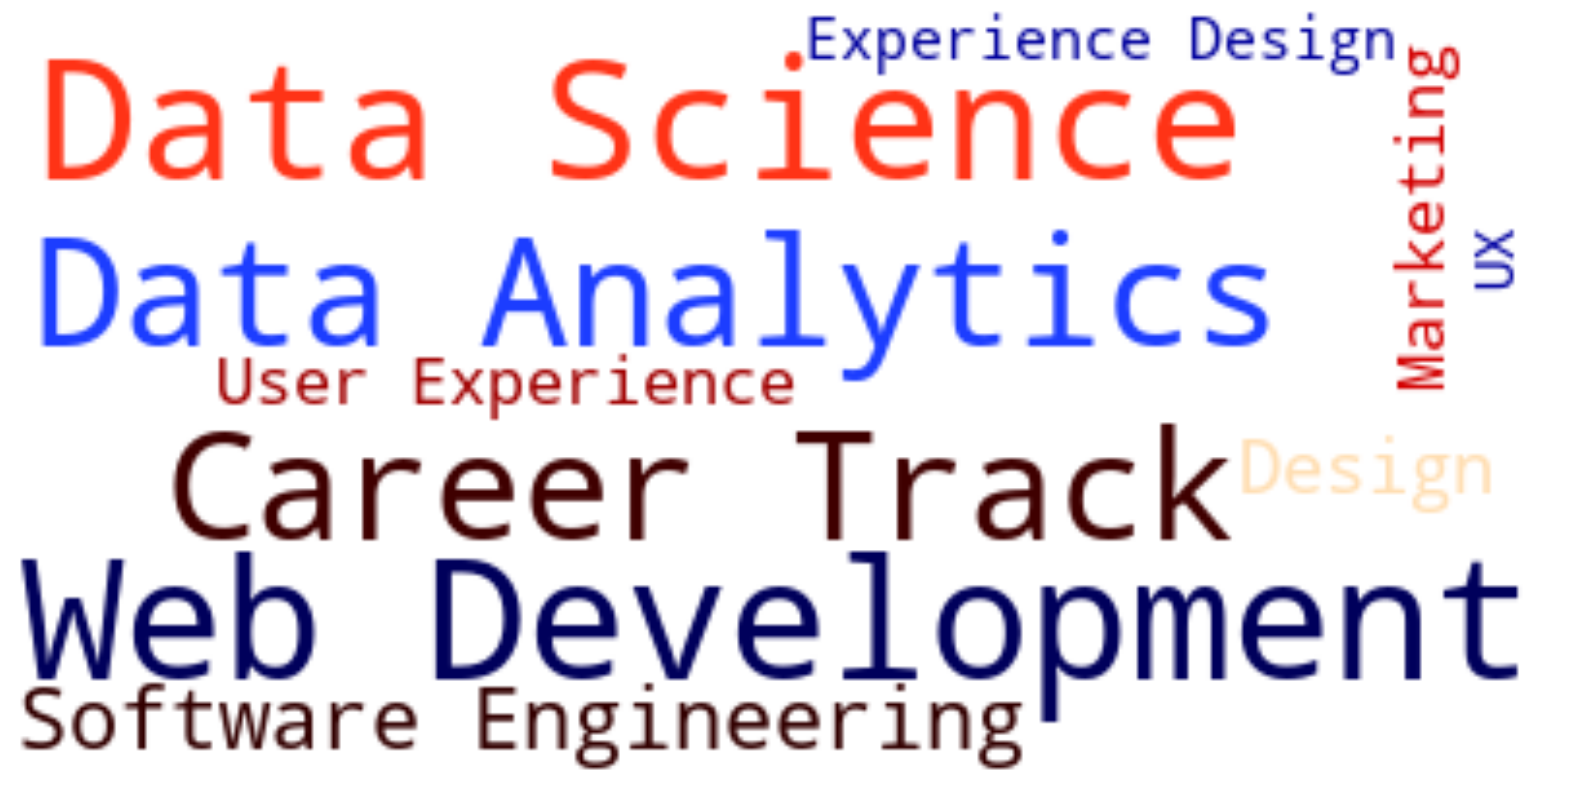

In [47]:
#Set a stopword list for Course Report
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['online','full-time','part-time','bootcamp','course','full','time','part','week']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

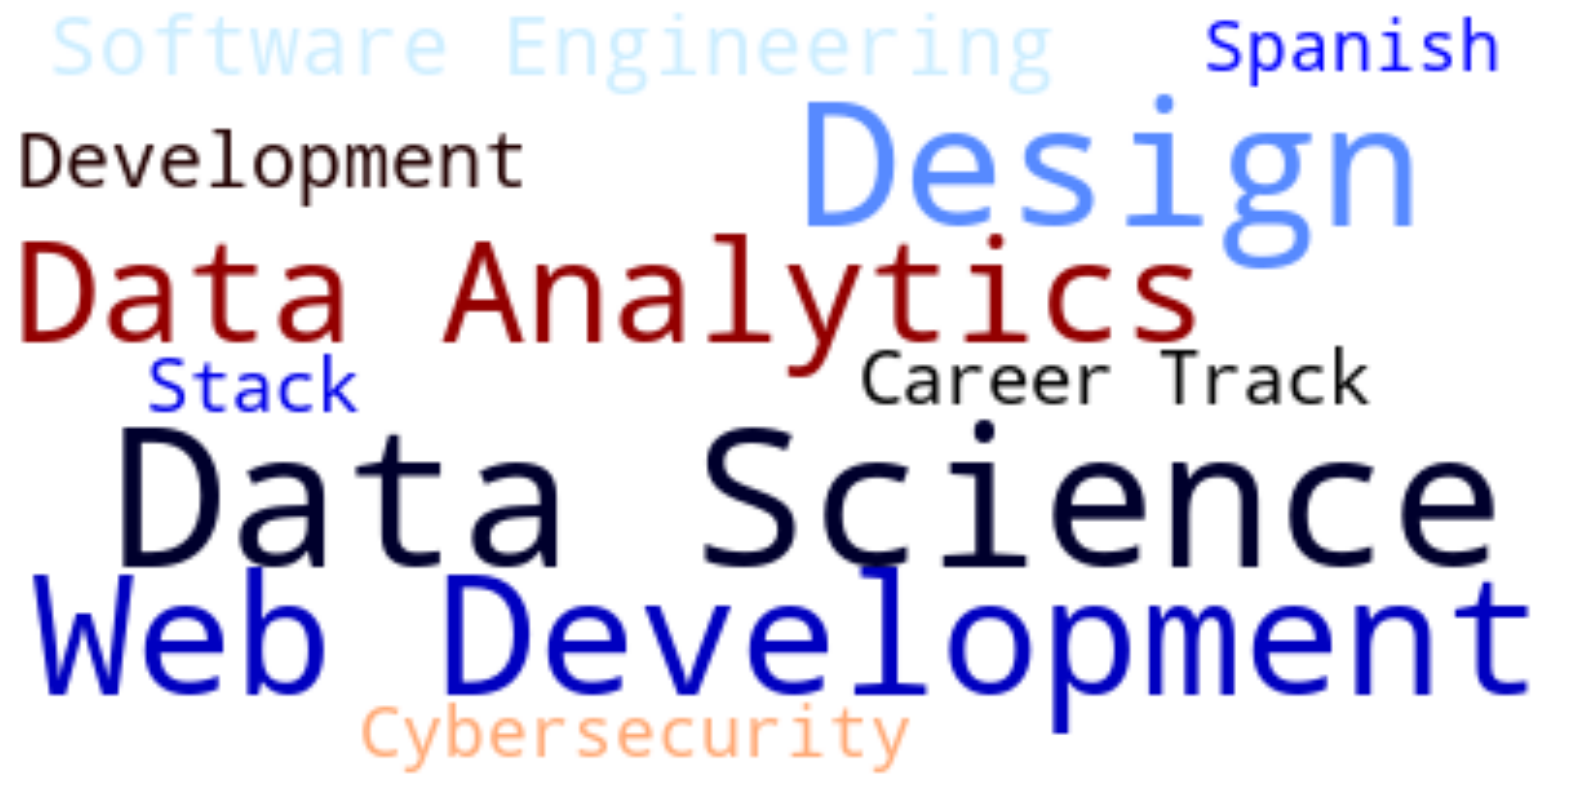

In [50]:
#Get wordcloud for the course from Course Report

text_switchup=courses['courses'].str.cat(sep=' ')
text_switchup

#Set a stopword list for Course Report
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


stopwords= set(STOPWORDS)
new_words = ['online','full-time','part-time','bootcamp','course','full','time','part','week','short','program']
new_stopwords=stopwords.union(new_words)


plt.rcParams["figure.figsize"] = (20,20)

# Make Wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white",stopwords=new_stopwords, colormap='flag').generate(text_switchup)

# Plot Wordcloud
plt.plot()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
import pandas as pd
import plotly.express as px

company_counts = locations.groupby('country.name')['school'].nunique().reset_index()
company_counts.columns = ['Country', 'Company Count']

# Create a world map using Plotly Express
fig = px.choropleth(
    company_counts,
    locations='Country',
    locationmode='country names',
    color='Company Count',
    title='Bootcamp Companies Worldwide',
    color_continuous_scale='Viridis',
    labels={'Company Count': 'Number of Companies'}
)

# Show the plot
fig.show()

## Create tables in MySQL

In [73]:
#Create tables for SwitchUp and CourseReport

import mysql.connector
cnx = mysql.connector.connect(
    user='root',
    password='DAPT2023',
    database='course_aggregator',
    port=3306,
    auth_plugin='mysql_native_password'
)
cursor = cnx.cursor()
print('MySQL connection established:', cnx.is_connected())

# SQL statements to create tables for Switchup
create_locations_switchup_table = """
CREATE TABLE locations_switchup (
    country_name VARCHAR(52),
    school VARCHAR(32),
    school_id INT,
    city_id INT PRIMARY KEY
    
);
"""
create_courses_switchup_table = """
CREATE TABLE IF NOT EXISTS courses_switchup (
    id INT AUTO_INCREMENT PRIMARY KEY,
    courses VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_badges_switchup_table = """
CREATE TABLE IF NOT EXISTS badges_switchup (
    id INT AUTO_INCREMENT PRIMARY KEY,
    badge_name VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_schools_switchup_table = """
CREATE TABLE IF NOT EXISTS schools_switchup (
    id INT AUTO_INCREMENT PRIMARY KEY,
    website VARCHAR(255),
    description TEXT,
    logo_url VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_reviews_switchup_table = """
CREATE TABLE IF NOT EXISTS reviews_switchup (
    overallRating FLOAT,
    total_reviews FLOAT,
    school VARCHAR(255),
    school_id INT PRIMARY KEY
);
"""

#Now CourseReport tables


create_locations_coursereport_table = """
CREATE TABLE locations_coursereport (
    id INT PRIMARY KEY,
    description VARCHAR(52),
    country_id INT,
    country_name VARCHAR(52),
    country_abbrev VARCHAR(20),
    city_id INT,
    city_name VARCHAR(32),
    city_keyword VARCHAR(32),
    state_id INT,
    state_name VARCHAR(32),
    state_abbrev VARCHAR(20),
    state_keyword VARCHAR(32),
    school VARCHAR(32),
    school_id INT
);
"""

create_courses_coursereport_table = """
CREATE TABLE IF NOT EXISTS courses_coursereport (
    id INT AUTO_INCREMENT PRIMARY KEY,
    courses VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_reviews_coursereport_table = """
CREATE TABLE IF NOT EXISTS reviews_coursereport (
    total_reviews FLOAT,
    overallRating FLOAT,
    school VARCHAR(255),
    school_id INT PRIMARY KEY
);
"""

# Execute the SQL statements to create tables for Switchup
cursor.execute(create_locations_switchup_table)
cursor.execute(create_courses_switchup_table)
cursor.execute(create_badges_switchup_table)
cursor.execute(create_schools_switchup_table)
cursor.execute(create_reviews_switchup_table)
# Execute the SQL statements to create tables for Coursereport
cursor.execute(create_locations_coursereport_table)
cursor.execute(create_courses_coursereport_table)
cursor.execute(create_reviews_coursereport_table)

# Commit the changes and close the connection
cnx.commit()
cnx.close()

MySQL connection established: True


## Insert dataframes into MySQL

In [74]:
#Switchup tables
import pandas as pd
from sqlalchemy import create_engine

# Assuming you have a DataFrame named 'locations'
# Replace NaN values with None
locations = locations.where(pd.notna(locations), None)

# Define database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': 'DAPT2023',
    'database': 'course_aggregator'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['database']}")

# Insert DataFrame into MySQL
locations.to_sql(name='locations_switchup', con=engine, if_exists='replace', index=False)
reviews.to_sql(name='reviews_switchup', con=engine, if_exists='replace', index=False)
switchup_schools.to_sql(name='schools_switchup', con=engine, if_exists='replace', index=False)
badges.to_sql(name='badges_switchup', con=engine, if_exists='replace', index=False)
courses.to_sql(name='courses_switchup', con=engine, if_exists='replace', index=False)
course_report_merged_locations_df.to_sql(name='locations_coursereport', con=engine, if_exists='replace', index=False)
course_report_merged_reviews_df.to_sql(name='reviews_coursereport', con=engine, if_exists='replace', index=False)
course_report_merged_courses_df.to_sql(name='courses_coursereport', con=engine, if_exists='replace', index=False)



# Close the engine
engine.dispose()



In [70]:
#Course Report tables
import pandas as pd
from sqlalchemy import create_engine

# Assuming you have a DataFrame named 'locations'
# Replace NaN values with None
locations = locations.where(pd.notna(locations), None)

# Define database connection parameters
db_params = {
    'host': 'localhost',
    'user': 'root',
    'password': 'DAPT2023',
    'database': 'CourseReport'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['database']}")

# Insert DataFrame into MySQL
course_report_merged_locations_df.to_sql(name='locations', con=engine, if_exists='replace', index=False)
course_report_merged_reviews_df.to_sql(name='reviews', con=engine, if_exists='replace', index=False)
course_report_merged_courses_df.to_sql(name='courses', con=engine, if_exists='replace', index=False)


# Close the engine
engine.dispose()

"""#Create tables for CourseReport
import mysql.connector
cnx = mysql.connector.connect(
    user='root',
    password='DAPT2023',
    database='CourseReport',
    port=3306,
    auth_plugin='mysql_native_password'
)
cursor = cnx.cursor()
print('MySQL connection established:', cnx.is_connected())

# SQL statements to create tables
create_locations_table = """
"""CREATE TABLE locations (
    id INT PRIMARY KEY,
    description VARCHAR(52),
    country_id INT,
    country_name VARCHAR(52),
    country_abbrev VARCHAR(20),
    city_id INT,
    city_name VARCHAR(32),
    city_keyword VARCHAR(32),
    state_id INT,
    state_name VARCHAR(32),
    state_abbrev VARCHAR(20),
    state_keyword VARCHAR(32),
    school VARCHAR(32),
    school_id INT
);
"""

#create_courses_table = """
CREATE TABLE IF NOT EXISTS courses (
    id INT AUTO_INCREMENT PRIMARY KEY,
    courses VARCHAR(255),
    school VARCHAR(255),
    school_id INT
);
"""
create_reviews_table = """
CREATE TABLE IF NOT EXISTS reviews (
    total_reviews FLOAT,
    overallRating FLOAT,
    school VARCHAR(255),
    school_id INT PRIMARY KEY
);
"""
# Execute the SQL statements to create tables
cursor.execute(create_locations_table)
cursor.execute(create_courses_table)
cursor.execute(create_reviews_table)

# Commit the changes and close the connection
cnx.commit()
cnx.close()"""